## Análisis Exploratorio de Datos de Ofertas Laborales en Chile (TI)

- Cuales son las principales fuentes de publicaciones?
- Cuales son los roles mas solicitados?
- Que trabajos estan mejor remunerados?
- Cual es la composicion de roles especificos(Backend, Frontend, Full-Stack, etc...) de los trabajos de software engineer?
- Que compañias tienen mas ofertas de trabajo?
- Que porcentaje de trabajo es online vs presencial?
- Que importancia tiene una carrera universitaria al postular a un trabajo?

In [75]:
%pip install seaborn --upgrade


In [76]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="ticks")



dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
df.shape

(785741, 17)

In [77]:
df.columns

Index(['job_title_short', 'job_title', 'job_location', 'job_via',
       'job_schedule_type', 'job_work_from_home', 'search_location',
       'job_posted_date', 'job_no_degree_mention', 'job_health_insurance',
       'job_country', 'salary_rate', 'salary_year_avg', 'salary_hour_avg',
       'company_name', 'job_skills', 'job_type_skills'],
      dtype='object')

In [78]:
df_chile = df[df['job_country'] == 'Chile'].copy()

#### Eliminar publicaciones duplicadas

Se eliminaran priorizando la que se publico primero

In [79]:
df_chile.sort_values('job_posted_date', inplace=True)

In [80]:
df_chile.drop_duplicates(['job_title','company_name','job_type_skills','job_location'], inplace=True)
df_chile

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
337574,Senior Data Scientist,Insight Analyst Senior,"Las Condes, Chile",via EMPREGO,Full-time,False,Chile,2023-01-01 00:16:14,True,False,Chile,None,NaN,NaN,Worldgroup Careers MWT,"[bigquery, power bi]","{'analyst_tools': ['power bi'], 'cloud': ['big..."
785200,Business Analyst,Warehouse Analyst,Chile,via BeBee Chile,Full-time,False,Chile,2023-01-01 07:16:12,True,False,Chile,None,NaN,NaN,PUMA,[excel],{'analyst_tools': ['excel']}
785169,Data Engineer,Data Engineer,"Las Condes, Chile",via BeBee Chile,Full-time,False,Chile,2023-01-01 07:16:21,True,False,Chile,None,NaN,NaN,Consorcio,"[python, sql, aws]","{'cloud': ['aws'], 'programming': ['python', '..."
785128,Machine Learning Engineer,ML Engineer,"Santiago, Chile",via BeBee Chile,Full-time,False,Chile,2023-01-01 07:16:21,False,False,Chile,None,NaN,NaN,Fusemachines,"[python, tensorflow, pytorch]","{'libraries': ['tensorflow', 'pytorch'], 'prog..."
568354,Data Scientist,SE BUSCA DATA SCIENTIST SEMI SENIOR,"Santiago, Chile",via Chiletrabajos,Full-time,False,Chile,2023-01-01 10:14:43,False,False,Chile,None,NaN,NaN,SAC Informáticos,"[sql, azure, pandas, numpy, git]","{'cloud': ['azure'], 'libraries': ['pandas', '..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364771,Data Scientist,Data Scientist,"Santiago, Chile",via Indeed Chile,Full-time and Contractor,False,Chile,2023-12-29 23:09:30,False,False,Chile,None,NaN,NaN,SECURITY S.A,None,None
655306,Business Analyst,Marketing Analyst CL (Remote),Anywhere,via LinkedIn,Full-time,True,Chile,2023-12-30 10:05:27,False,False,Chile,None,NaN,NaN,Simera,"[sql, excel, tableau]","{'analyst_tools': ['excel', 'tableau'], 'progr..."
197692,Data Engineer,Data Engineer,"Las Condes, Chile",via Trabajo En Chile,Full-time,False,Chile,2023-12-30 15:05:33,True,False,Chile,None,NaN,NaN,Deloitte Chile,None,None
328220,Data Analyst,"Data Manager, Gerencia Walmart Digital","Quilicura, Chile",via AIRA,Full-time,False,Chile,2023-12-30 23:05:27,True,False,Chile,None,NaN,NaN,Walmart Chile,None,None


## Cuales son las principales fuentes de las publicaciones?

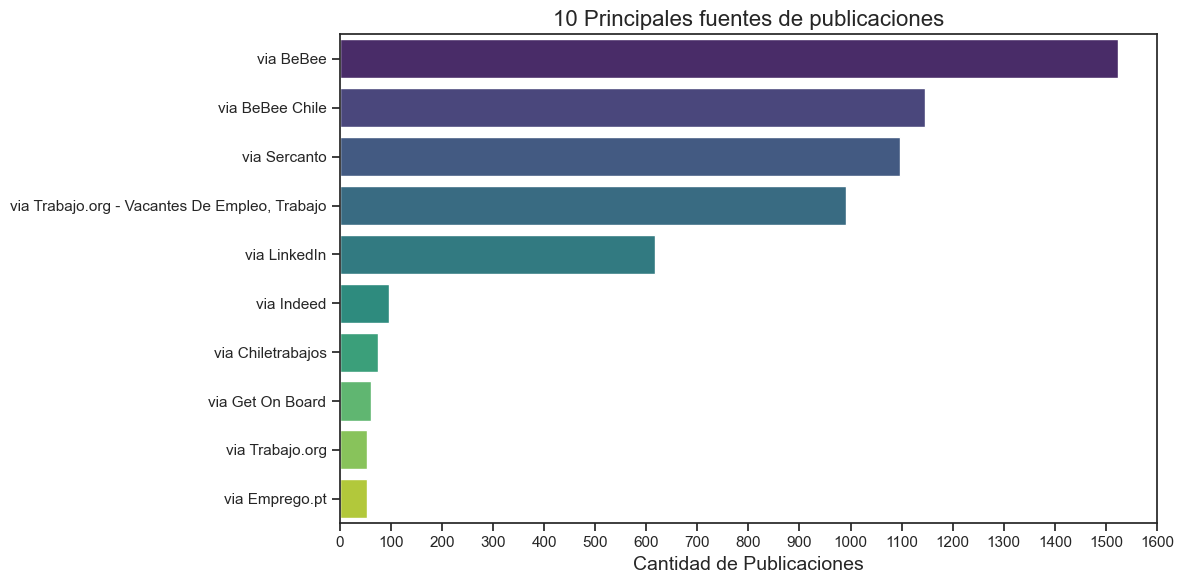

In [81]:
top_job_counts = df_chile['job_via'].value_counts().head(10).reset_index()
top_job_counts.columns = ['job_via', 'size']

plt.figure(figsize=(12, 6))

sns.barplot(data=top_job_counts, y='job_via', x='size', palette='viridis')

plt.title('10 Principales fuentes de publicaciones', fontsize=16)
plt.xlabel('Cantidad de Publicaciones', fontsize=14)
plt.ylabel('', fontsize=14)

plt.xticks(ticks=range(0, top_job_counts['size'].max() + 100, 100))

plt.tight_layout()

plt.show()

## Roles mas solicitados

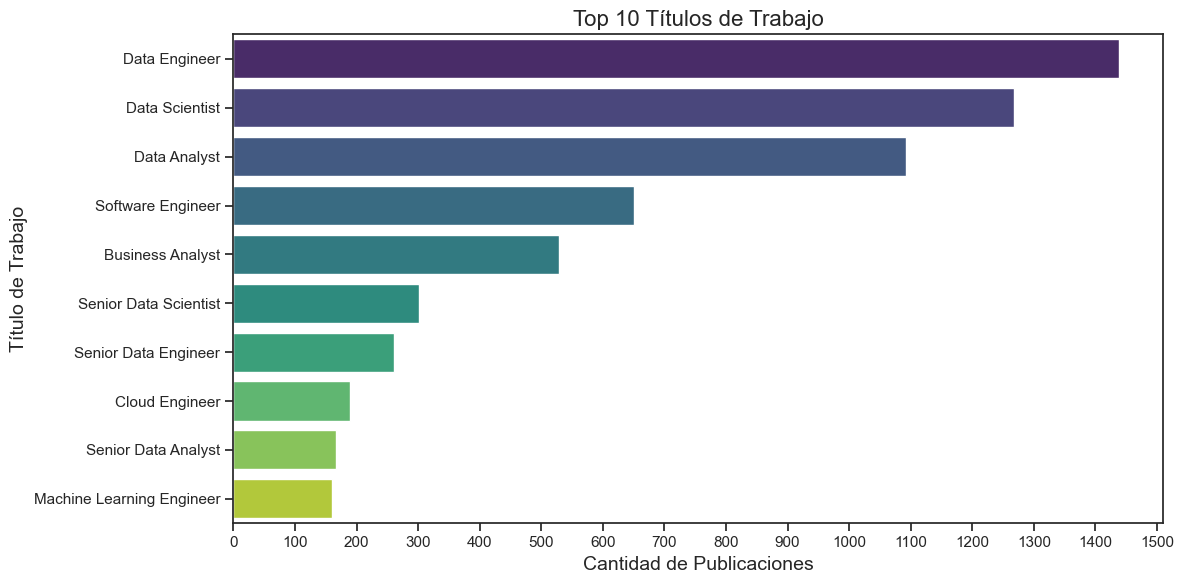

In [82]:

job_counts = df_chile.groupby('job_title_short')['job_title_short'].agg(['size']).reset_index()

top_job_counts = job_counts.sort_values(by='size', ascending=False)

plt.figure(figsize=(12, 6))

sns.barplot(data=top_job_counts, y='job_title_short', x='size', palette='viridis')

plt.title('Top 10 Títulos de Trabajo', fontsize=16)
plt.xlabel('Cantidad de Publicaciones', fontsize=14)
plt.ylabel('Título de Trabajo', fontsize=14)

plt.xticks(ticks=range(0, top_job_counts['size'].max() + 100, 100))

plt.tight_layout()

plt.show()


## Que trabajos estan mejor remunerados?

In [83]:

df_chile_not_na = df_chile['salary_year_avg'].dropna()
df_chile[df_chile.index.isin(df_chile_not_na.index)].sort_values(by='salary_year_avg', ascending=False)[
    ['salary_year_avg', 'job_title', 'job_title_short','job_work_from_home', 'company_name', 'job_location', 'job_via','job_no_degree_mention']
    ]

,salary_year_avg,job_title,job_title_short,job_work_from_home,company_name,job_location,job_via,job_no_degree_mention
358699,166000.0,Machine Learning Engineer,Machine Learning Engineer,False,ZeroFox,"Santiago, Chile",via Ai-Jobs.net,False
217100,163875.0,Digital Data Scientist,Data Scientist,False,Nestlé,Chile,via Ai-Jobs.net,False
758009,157500.0,Sr. Data Scientist,Data Scientist,False,Visa,"Santiago, Chile",via Ai-Jobs.net,False
187017,154000.0,Data Architect,Data Analyst,False,Nestlé,Chile,via Ai-Jobs.net,False
6325,147500.0,Data Engineer (Chile) Sb4375,Data Engineer,False,Nisum,"Santiago, Chile",via Ai-Jobs.net,False
498673,146000.0,Data Engineer,Data Engineer,False,Nestlé,Chile,via Ai-Jobs.net,True
128404,121000.0,Data Scientist (Data Driven MKT) Career,Data Scientist,False,Equifax,Chile,via Ai-Jobs.net,False
443645,100500.0,Práctica Profesional Data Analyst & Documentation,Data Analyst,False,SimpliRoute,Chile,via Ai-Jobs.net,False
219062,64800.0,Ingeniero de Datos/MLOps,Data Engineer,False,The Bridge Social,"Santiago, Chile",via Ai-Jobs.net,False
237955,64800.0,Data Management Specialist II,Data Scientist,False,Experian,"Santiago, Chile",via Ai-Jobs.net,False


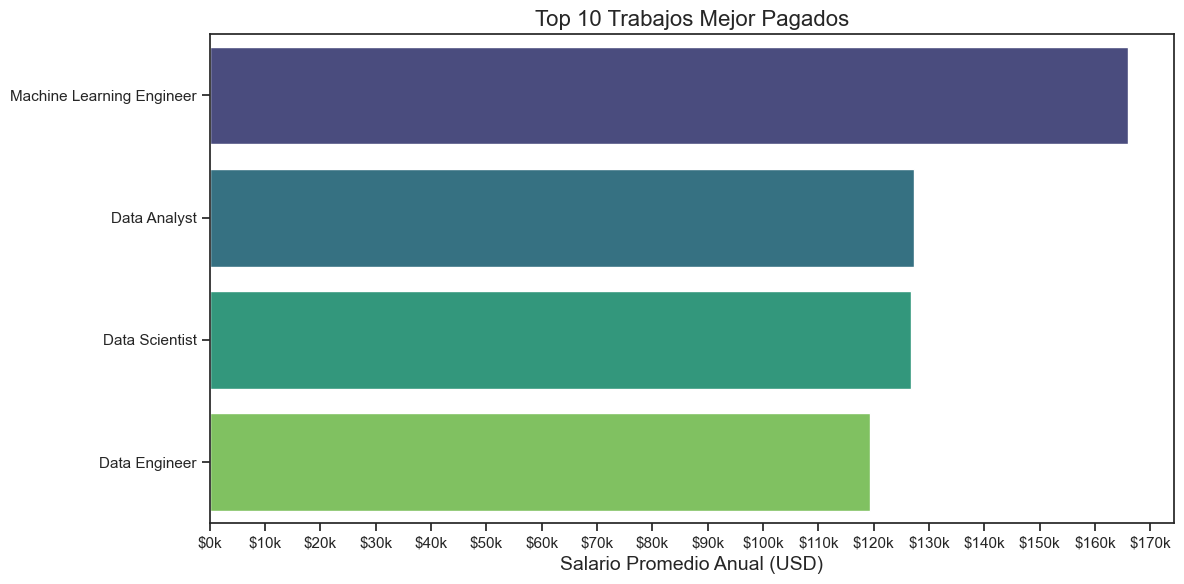

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

salary_data = df_chile[['salary_year_avg', 'job_title_short']].dropna()

avg_salary = salary_data.groupby('job_title_short')['salary_year_avg'].mean().reset_index()

top_salary_jobs = avg_salary.sort_values(by='salary_year_avg', ascending=False).head(10)

plt.figure(figsize=(12, 6))

sns.barplot(data=top_salary_jobs, y='job_title_short', x='salary_year_avg', palette='viridis')

plt.title('Top 10 Trabajos Mejor Pagados', fontsize=16)
plt.xlabel('Salario Promedio Anual (USD)', fontsize=14)
plt.ylabel('', fontsize=14) 

max_salary = int(top_salary_jobs['salary_year_avg'].max())
plt.xticks(ticks=range(0, max_salary + 10000, 10000), 
           labels=[f'${int(x/1000)}k' for x in range(0, max_salary + 10000, 10000)])

plt.tight_layout()

plt.show()


In [85]:

salary_info_counts = df_chile['salary_year_avg'].isnull().value_counts(normalize=True)
salary_info_percentages = salary_info_counts * 100
salary_info_percentages.index = ['Sin Información', 'Con Información']
print("Porcentaje de empleos con información salarial: {:.1f}%".format(salary_info_percentages['Con Información']))


Porcentaje de empleos con información salarial: 0.2%


#### La mayoría de los trabajos en Chile no incluyen información salarial en sus ofertas, solo el 0.2% de estos indican salario, lo que limita el análisis del mercado laboral. Además, los datos presentados en el gráfico anterior son solo representativos únicamente de roles relacionados a los datos y provienen de una única via (Ai-Jobs.net).

## Cual es la composicion de roles especificos(Backend, Frontend, Full-Stack, etc...) de los trabajos de software engineer

In [86]:
df_chile_sw_eng = df_chile[df_chile['job_title_short'] == 'Software Engineer'].copy()


In [87]:
df_chile_sw_eng_exp = df_chile_sw_eng.explode('job_skills')
df_chile_sw_eng_exp['job_skills'].unique()

array(['java', 'python', 'go', 'aws', 'kafka', 'spring', 'linux',
       'jenkins', 'git', 'docker', 'terraform', 'ansible', 'azure', 'gcp',
       'hadoop', 'spark', 'kubernetes', 'slack', 'r', 'javascript',
       'html', 'css', 'sql', 'react.js', 'github', 'gitlab', 'bitbucket',
       None, 'firebase', 'sheets', 'excel', 'c#', 'c++', 'postgresql',
       'dynamodb', 'redis', 'jira', 'confluence', 'asana', 'shell',
       'sql server', 'mysql', 'selenium', 'angular', 'chef', 'atlassian',
       'unity', 'unreal', 'flask', 'fastapi', 'perl', 'windows', 'unix',
       'outlook', 'kotlin', 'nosql', 'graphql', 'spreadsheet',
       'cassandra', 'node', 'express', 'assembly', 'scala', 'c', 'react',
       'django', 'vue', 'sap', 'groovy', 'aurora', 'matlab', 'tableau',
       'asp.net', 'typescript', 'php', 'tensorflow', 'pytorch', 'flow',
       'flutter', 'power bi', 'svelte', 'ruby', 'node.js',
       'ruby on rails', 'snowflake', 'looker', 'datarobot', 'notion',
       't-sql', 'svn'

In [88]:
frontend_skills = [
    'react', 'react.js', 'angular', 'vue', 'vue.js', 
    'html', 'css', 'svelte', 'flutter', 'graphql', 
    'jquery', 'sass', 'next.js', 'gatsby', 'ionic'
]
backend_skills = [
    'express', 'django', 'flask', 'spring', 'node.js', 'go', 
    'python', 'java', 'kafka', 'hadoop', 'spark', 'ruby', 'php', 
    'erlang', 'scala', 'perl', 'rust', 'pyspark', 'golang', 
    'c#', 'fastapi', 'asp.net', 'asp.net core', 'sqlite'
]

In [89]:
import ast

def classify_job_skills(row):
    skills_string = row['job_skills']
    title = row['job_title']
    
    title_lower = title.lower()  

    if 'full' in title_lower:
        return 'Full-Stack'
    if 'front' in title_lower:
        return 'Frontend'
    if 'back' in title_lower :
        return 'Backend'


    if not skills_string:  
        return 'Otros'
    
    try:
        skills_list = ast.literal_eval(skills_string) if isinstance(skills_string, str) else skills_string
    except (ValueError, SyntaxError):
        return 'Otros'
    
    frontend_match = any(skill in frontend_skills for skill in skills_list)
    backend_match = any(skill in backend_skills for skill in skills_list)
    
    if frontend_match and backend_match:
        return 'Full-Stack'
    elif frontend_match:
        return 'Frontend'
    elif backend_match:
        return 'Backend'
    else:
        return 'Otros'

df_chile_sw_eng['role'] = df_chile_sw_eng.apply(classify_job_skills, axis=1)

df_chile_sw_eng[['job_title', 'job_skills', 'role']].sample(10, random_state=1555)


,job_title,job_skills,role
275952,Principal Software Engineer,"[php, ruby, ruby, python, java, elixir, rust, ...",Full-Stack
395485,Senior Application Engineer,None,Otros
63016,Sr. Software Engineer,"[python, mongodb, mongodb, mysql, aws, azure, ...",Full-Stack
126148,Senior Backend Engineer,"[ruby, ruby, javascript, postgresql, node.js, ...",Backend
379470,Principal Engineer,[outlook],Otros
356943,TS Implementation Engineer L1,None,Otros
279375,Middle Graphics Software Engineer,"[c++, unity, unreal]",Otros
396716,Junior Implementation Engineer,None,Otros
280245,Senior QA Engineer,[word],Otros
2344,Práctica Product Analyst,[excel],Otros


In [90]:
df_chile_sw_eng.groupby(['role'])['role'].agg(['count'])

,count
role,
Backend,237
Frontend,38
Full-Stack,88
Otros,288


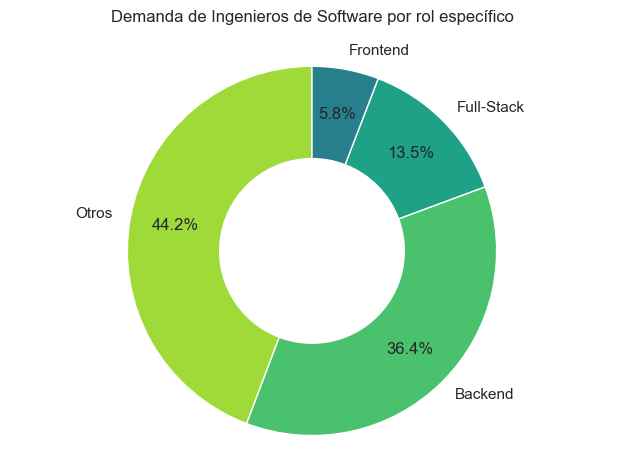

In [91]:
colors = sns.color_palette('viridis_r')

df_chile_sw_eng['role'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops=dict(width=0.5, edgecolor='w'), 
    pctdistance=0.75
)

plt.ylabel('') 
plt.title('Demanda de Ingenieros de Software por rol específico\n')
plt.axis('equal') 

plt.tight_layout()

plt.show()


## Que importancia tiene una carrera universitaria al postular a un trabajo?

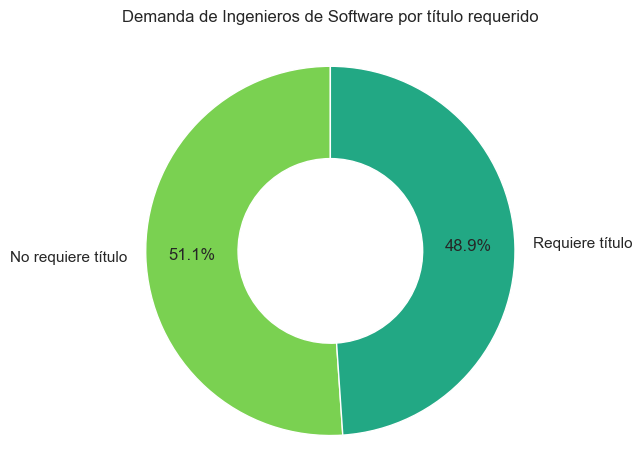

In [92]:

colors = sns.color_palette('viridis_r', 4)

df_chile['job_no_degree_mention'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    labels=['No requiere título', 'Requiere título'],
    wedgeprops=dict(width=0.5, edgecolor='w'),
    pctdistance=0.75

)

plt.ylabel('')
plt.title('Demanda de Ingenieros de Software por título requerido\n')
plt.axis('equal')


plt.tight_layout()

plt.show()

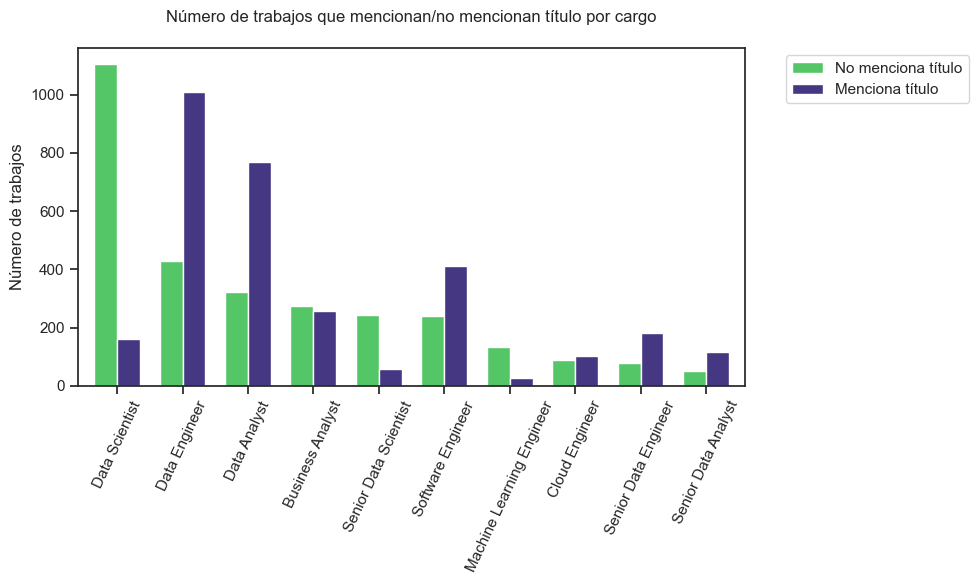

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

degree_data = df_chile.groupby('job_title_short')['job_no_degree_mention'].value_counts(normalize=False).unstack()

degree_data = degree_data.sort_values(by=False, ascending=False)

ax = degree_data.plot(kind='bar', stacked=False, color=["#55C667FF", "#453781FF"], figsize=(10, 6), width=0.7)

plt.title('Número de trabajos que mencionan/no mencionan título por cargo\n')
plt.xlabel('')
plt.ylabel('Número de trabajos')
plt.xticks(rotation=65)


plt.legend(['No menciona título', 'Menciona título'], title='', bbox_to_anchor=(1.05, 1), loc='upper left')



plt.tight_layout()

plt.show()


## Empresas con mas ofertas laborales

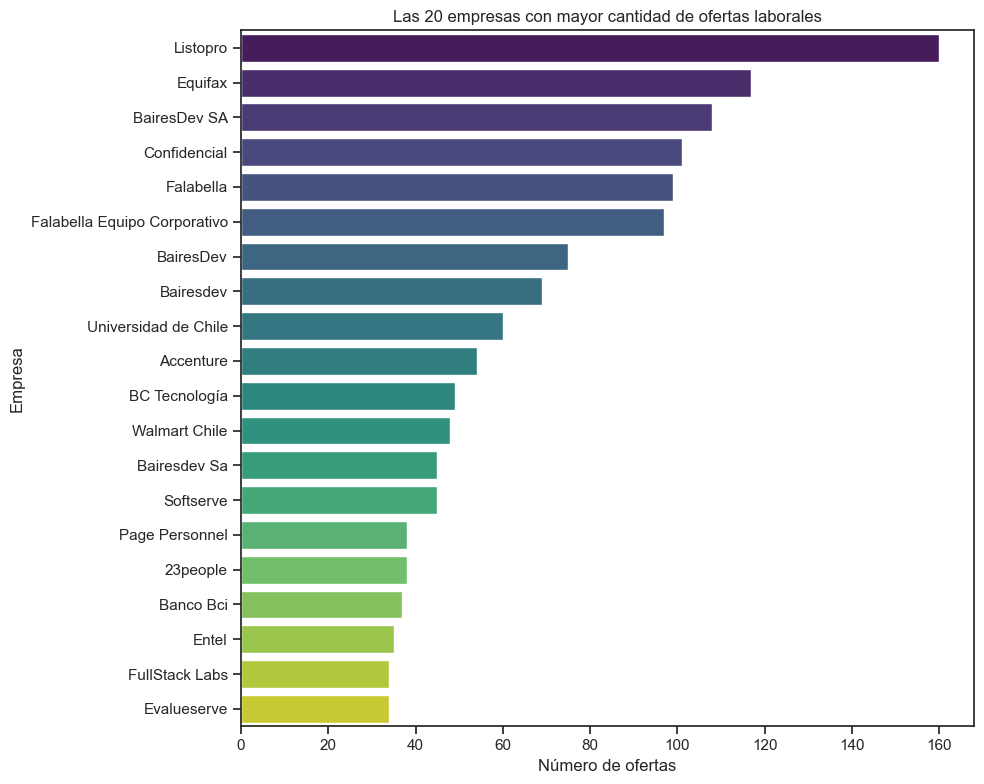

In [94]:
company_counts = df_chile['company_name'].value_counts().head(20) 

plt.figure(figsize=(10,8))
sns.barplot(x=company_counts.values, y=company_counts.index, palette='viridis')

plt.title('Las 20 empresas con mayor cantidad de ofertas laborales')
plt.xlabel('Número de ofertas')
plt.ylabel('Empresa')

plt.tight_layout()
plt.show()


## Estacionalidad en ofertas de trabajo

c:\Users\jeanl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jeanl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


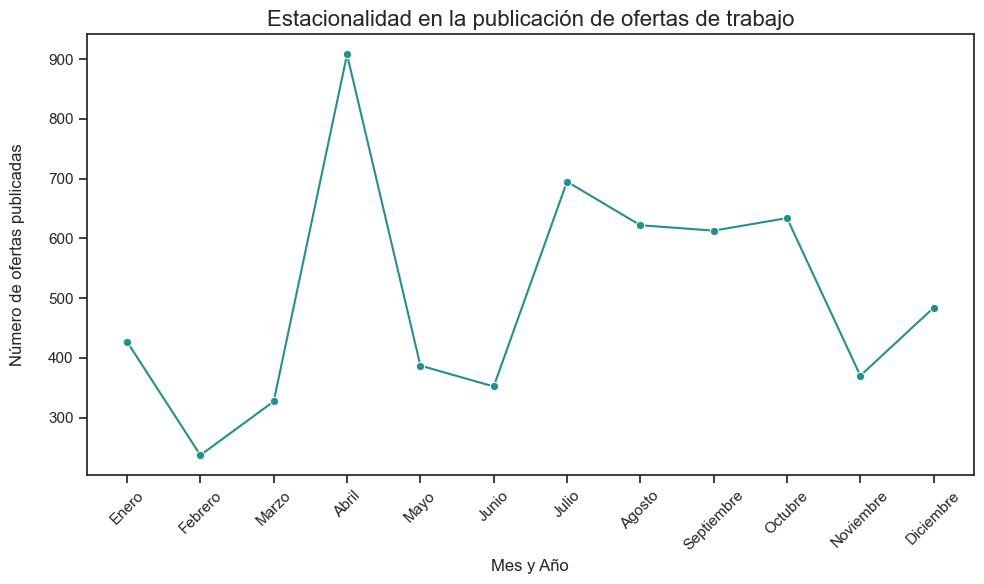

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import locale

locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')

df_chile.replace([float('inf'), -float('inf')], pd.NA, inplace=True)

df_chile['job_posted_date'] = pd.to_datetime(df_chile['job_posted_date'])

df_chile['year_month'] = df_chile['job_posted_date'].dt.to_period('M')

monthly_counts = df_chile.groupby('year_month').size().reset_index(name='count')

monthly_counts['year_month'] = monthly_counts['year_month'].dt.strftime('%B').str.capitalize()

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_counts, x='year_month', y='count', marker='o', color=sns.color_palette("viridis", 1)[0])

plt.title('Estacionalidad en la publicación de ofertas de trabajo', fontsize=16)
plt.xlabel('Mes y Año', fontsize=12)
plt.ylabel('Número de ofertas publicadas\n', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## Trabajo remoto vs presencial

Detectar si hay trabajos que indican ser remotos en el titulo

In [96]:
df_chile['job_work_from_home'] = df_chile.apply(lambda row: True if 'remoto' in row['job_title'].lower(
) or 'remote' in row['job_title'].lower() else row['job_work_from_home'], axis=1)

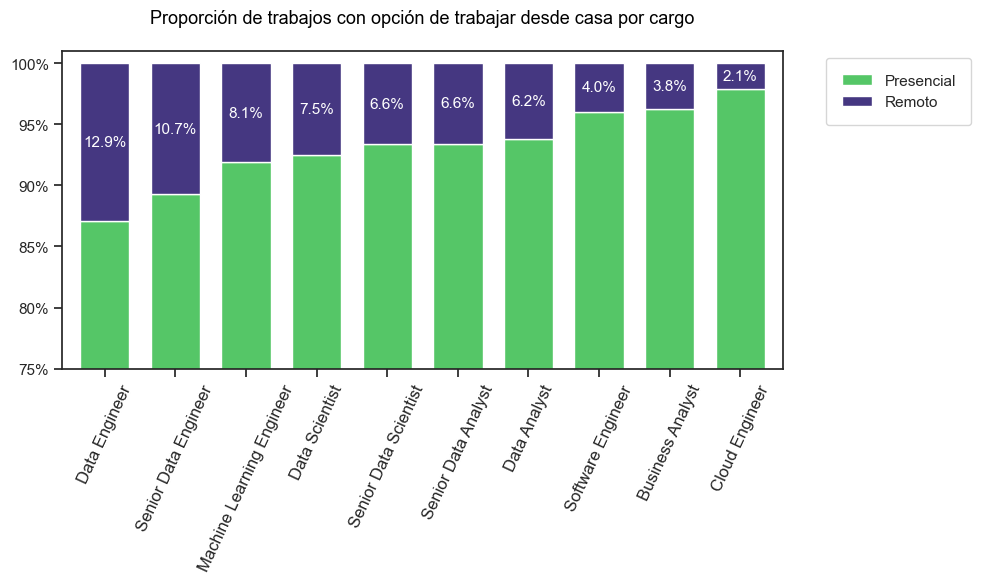

In [97]:
from matplotlib.ticker import FuncFormatter



wfh_data = df_chile.groupby('job_title_short')['job_work_from_home'].value_counts(normalize=True).unstack()
wfh_data = wfh_data * 100
wfh_data = wfh_data.sort_values(by=True, ascending=False)



ax = wfh_data.plot(kind='bar', stacked=True, color=[ "#55C667FF", "#453781FF"], figsize=(10, 6), width=0.7)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=11, color='white')

def percent_formatter(x, pos):
    return f'{int(x)}%'

ax.yaxis.set_major_formatter(FuncFormatter(percent_formatter))

plt.title('Proporción de trabajos con opción de trabajar desde casa por cargo', 
          pad=20, fontsize=13, fontweight='regular', color='black', loc='center')  
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=65, fontsize=12)
plt.ylim(75, 101)

plt.legend(['Presencial', 'Remoto'], title='', bbox_to_anchor=(1.05, 1), loc='upper left', borderpad=1)

plt.tight_layout()
plt.show()


In [98]:
df_chile[(df_chile['job_work_from_home'] == False)
         & (df['job_title'] == 'Data Analyst')]

C:\Users\jeanl\AppData\Local\Temp\ipykernel_10256\2870906347.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_chile[(df_chile['job_work_from_home'] == False)


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,year_month
411294,Data Analyst,Data Analyst,"Santiago, Chile","via Trabajo.org - Vacantes De Empleo, Trabajo",Full-time,False,Chile,2023-01-02 16:46:27,True,False,Chile,None,NaN,NaN,Imagemaker,"[sql, r, python, sql server, react, excel, visio]","{'analyst_tools': ['excel', 'visio'], 'databas...",2023-01
672390,Data Analyst,Data Analyst,"Las Condes, Chile",via Jooble,Full-time,False,Chile,2023-01-03 20:31:27,True,False,Chile,None,NaN,NaN,"Equifax, Inc.","[sql, python, r, bigquery, pyspark]","{'cloud': ['bigquery'], 'libraries': ['pyspark...",2023-01
352523,Data Analyst,Data Analyst,"Santiago, Chile",via EMPREGO,Full-time,False,Chile,2023-01-05 00:00:08,True,False,Chile,None,NaN,NaN,Falabella Financiero,"[sql, gcp]","{'cloud': ['gcp'], 'programming': ['sql']}",2023-01
668079,Data Analyst,Data Analyst,"Las Condes, Chile",via BeBee Chile,Full-time,False,Chile,2023-01-06 11:07:46,True,False,Chile,None,NaN,NaN,Equifax,"[sql, python, r, bigquery, pyspark]","{'cloud': ['bigquery'], 'libraries': ['pyspark...",2023-01
259769,Data Analyst,Data Analyst,"Santiago, Chile",via BeBee Chile,Full-time,False,Chile,2023-01-07 07:27:53,False,False,Chile,None,NaN,NaN,MAS Analytics,"[sql, gcp, azure, aws, qlik, tableau, power bi]","{'analyst_tools': ['qlik', 'tableau', 'power b...",2023-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380144,Data Analyst,Data Analyst,Chile,via BeBee,Full-time,False,Chile,2023-12-24 18:21:33,False,False,Chile,None,NaN,NaN,Kalexius,"[word, excel, powerpoint]","{'analyst_tools': ['word', 'excel', 'powerpoin...",2023-12
381479,Data Analyst,Data Analyst,"Santiago, Chile",via BeBee,Full-time,False,Chile,2023-12-24 18:21:33,True,False,Chile,None,NaN,NaN,Marsh,"[word, excel]","{'analyst_tools': ['word', 'excel']}",2023-12
290627,Data Analyst,Data Analyst,"Santiago, Chile",via Indeed,Full-time,False,Chile,2023-12-27 17:07:48,True,False,Chile,None,NaN,NaN,RSM Chile,"[python, r, sql, sharepoint, power bi, tableau...","{'analyst_tools': ['sharepoint', 'power bi', '...",2023-12
390447,Data Analyst,Data Analyst,"Santiago, Chile",via BeBee,Full-time,False,Chile,2023-12-27 18:07:48,False,False,Chile,None,NaN,NaN,Johnson & Johnson,"[sql, python, r, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr...",2023-12


## Trabajo por regiones

Considerar ubicacion Remoto para trabajos remotos

In [99]:
df_chile['job_location_mapped'] = df_chile.apply(
    lambda row: 'Remoto' if row['job_work_from_home'] == True else row['job_location'], axis=1
)

Mapear Ubicaciones a Regiones

In [100]:
df_chile['job_location'].unique()

array(['Las Condes, Chile', 'Chile', 'Santiago, Chile', 'Hualpén, Chile',
       'La Florida, Chile', 'Santiago Metropolitan Region, Chile',
       'Valparaíso, Chile', 'Temuco, Chile', 'Concepción, Chile',
       'Recoleta, Chile', 'Los Álamos, Los Alamos, Chile', 'Anywhere',
       'Colina, Chile', 'Providencia, Chile',
       'Los Ángeles, Los Angeles, Chile', 'Rancagua, Chile',
       'Ñuñoa, Chile', 'La Serena, Chile', 'Huechuraba, Chile',
       'Vitacura, Chile', 'Coquimbo, Chile', 'Viña del Mar, Chile',
       'Santiago, Ñuñoa, Chile', 'San Bernardo, Chile',
       'Tierra Amarilla, Chile', 'Santa Cruz, Chile',
       'San Fernando, Chile', 'Pudahuel, Chile',
       'Providencia, Las Condes, Chile', 'Estación Central, Chile',
       'Renca, Chile', 'San Miguel, Pedro Aguirre Cerda, Chile',
       'Santiago, Providencia, Chile', 'Puente Alto, Chile',
       'Alto Bio Bio, Alto Biobío, Chile', 'San Joaquín, Chile',
       'Santo Domingo, Chile', 'Victoria, Chile (+8 others)',
   

In [101]:
location_mapping = {
    "Santiago, Chile": "Metropolitana",
    "Chile": "Sin Especificar",
    "Las Condes, Chile": "Metropolitana",
    "Anywhere": "Remoto",
    "La Florida, Chile": "Metropolitana",
    "Providencia, Chile": "Metropolitana",
    "Valparaíso, Chile": "Valparaíso",
    "Huechuraba, Chile": "Metropolitana",
    "Renca, Chile": "Metropolitana",
    "Concepción, Chile": "Biobío",
    "Viña del Mar, Chile": "Valparaíso",
    "Quilicura, Chile": "Metropolitana",
    "La Serena, Chile": "Coquimbo",
    "Chiguayante, Chile": "Biobío",
    "Vitacura, Chile": "Metropolitana",
    "Puerto Montt, Chile": "Los Lagos",
    "Colina, Chile": "Metropolitana",
    "Temuco, Chile": "Araucanía",
    "Rancagua, Chile": "O'Higgins",
    "Hualpén, Chile": "Biobío",
    "Pudahuel, Chile": "Metropolitana",
    "San Bernardo, Chile": "Metropolitana",
    "Poconchile, Arica, Chile": "Arica y Parinacota",
    "Talca, Chile": "Maule",
    "Antofagasta, Chile": "Antofagasta",
    "Coquimbo, Chile": "Coquimbo",
    "Ñuñoa, Chile": "Metropolitana",
    "Iquique, Chile": "Tarapacá",
    "Los Ángeles, Los Angeles, Chile": "Biobío",
    "Santa Cruz, Chile": "Sin Especificar",
    "Puente Alto, Chile": "Metropolitana",
    "Alto Bio Bio, Alto Biobío, Chile": "Biobío",
    "Recoleta, Chile": "Metropolitana",
    "Tierra Amarilla, Chile": "Atacama",
    "Valdivia, Chile": "Los Ríos",
    "Santiago, Providencia, Chile": "Metropolitana",
    "Santiago Metropolitan Region, Chile": "Metropolitana",
    "Los Álamos, Los Alamos, Chile": "Biobío",
    "San Carlos, Chile": "Biobío",
    "Bio Bio, Chile": "Biobío",
    "Santiago, Vitacura, Chile": "Metropolitana",
    "Talcahuano, Chile": "Biobío",
    "San Joaquín, Chile": "Metropolitana",
    "San Lorenzo de Tarapacá, Huara, Chile": "Tarapacá",
    "Santiago, Las Condes, Chile": "Metropolitana",
    "Santa Bárbara, Chile": "Biobío",
    "Santiago, Ñuñoa, Chile": "Metropolitana",
    "Santo Domingo, Chile": "Valparaíso",
    "Estación Central, Chile": "Metropolitana",
    "Talagante, Chile": "Metropolitana",
    "Quilpué, Quilpue, Chile": "Valparaíso",
    "Llanquihue, Chile": "Los Lagos",
    "Providencia, Las Condes, Chile": "Metropolitana",
    "Lampa, Chile": "Metropolitana",
    "Lo Barnechea, Chile": "Metropolitana",
    "Chile Chico, Chile": "Aysén",
    "Atacama, Freirina, Chile": "Atacama",
    "Victoria, Chile (+8 others)": "Araucanía",
    "Arica, Chile": "Arica y Parinacota",
    "Arauco, Chile": "Biobío",
    "Buin, Chile": "Metropolitana",
    "Conchalí, Conchali, Chile": "Metropolitana",
    "San Miguel, Pedro Aguirre Cerda, Chile": "Metropolitana",
    "San Fernando, Chile": "O'Higgins",
    "La Reina, Chile": "Metropolitana",
    "Río Negro, Chile": "Los Lagos",
    "Constitución, Constitucion, Chile": "Maule",
    "Copiapó, Copiapo, Chile": "Atacama",
    "Coronel de Maule, Cauquenes, Chile": "Maule",
    "Curico, Chile": "Maule",
    "Doñihue, Chile": "O'Higgins",
    "Providencia, Santiago, Chile": "Metropolitana",
    "El Bosque, Chile": "Metropolitana",
    "Maule, Chile": "Maule",
    "Maipú, Maipu, Chile": "Metropolitana",
    "Los Lagos, Chile": "Los Lagos",
    "Futaleufú, Futaleufu, Chile": "Los Lagos",
    "Agua Grande, La Serena, Chile": "Coquimbo"
}


In [102]:
df_chile['job_location_mapped'] = df_chile['job_location_mapped'].replace(location_mapping)

mapped_location_counts = df_chile.groupby('job_location_mapped')['job_location_mapped'].agg(['size']).sort_values('size', ascending=False)

df_chile['job_location_mapped'].unique()


array(['Metropolitana', 'Sin Especificar', 'Remoto', 'Biobío',
       'Valparaíso', 'Araucanía', "O'Higgins", 'Coquimbo', 'Atacama',
       'Maule', 'Los Lagos', 'Tarapacá', 'Arica y Parinacota',
       'Antofagasta', 'Aysén', 'Los Ríos'], dtype=object)

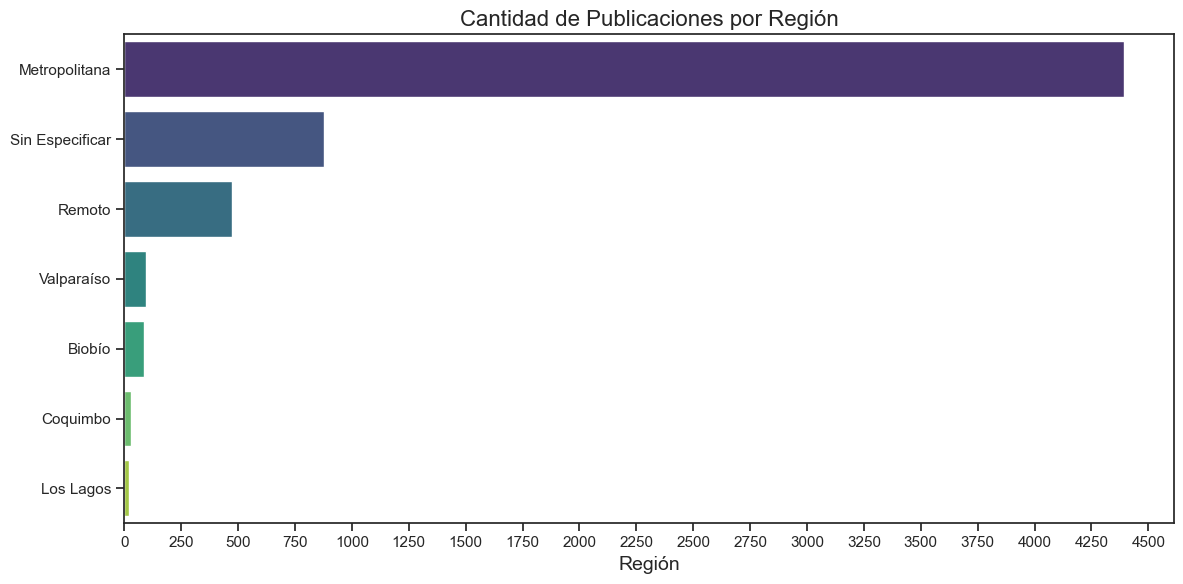

In [103]:
mapped_location_counts.reset_index(inplace=True)

plt.figure(figsize=(12, 6))
sns.barplot(data=mapped_location_counts.head(7), y='job_location_mapped', x='size', palette='viridis')

plt.title('Cantidad de Publicaciones por Región', fontsize=16)
plt.xlabel('Región', fontsize=14)
plt.ylabel('', fontsize=14)
 

plt.xticks(ticks=range(0, mapped_location_counts['size'].max()+250, 250))

plt.tight_layout()
plt.show()